In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from modules import io
from modules import vascular_data as sv
from modules.data import get_data

In [2]:
g_cfg_fn   = "../config/global.yaml"
c_cfg_fn   = "../config/rf_ct.yaml"

global_config = io.load_yaml(g_cfg_fn)
case_config   = io.load_yaml(c_cfg_fn)

FILES         = io.read_lines(global_config['FILES'])
print(FILES[:2])

['/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0080/positive/0', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0080/positive/1']


In [3]:
train_pos_list = [i+'.x.npy' for i in FILES if "positive" in i and any([c in i for c in case_config['TRAIN_PATTERNS']])]
train_neg_list = [i+'.x.npy' for i in FILES if "negative" in i and any([c in i for c in case_config['TRAIN_PATTERNS']])]

val_pos_list = [i+'.x.npy' for i in FILES if "positive" in i and any([c in i for c in case_config['VAL_PATTERNS']])]
val_neg_list = [i+'.x.npy' for i in FILES if "negative" in i and any([c in i for c in case_config['VAL_PATTERNS']])]

test_pos_list = [i+'.x.npy' for i in FILES if "positive" in i and any([c in i for c in case_config['TEST_PATTERNS']])]
test_neg_list = [i+'.x.npy' for i in FILES if "negative" in i and any([c in i for c in case_config['TEST_PATTERNS']])]


In [4]:
print(train_pos_list[:5])
print(train_neg_list[:5])

print(len(train_pos_list))
print(len(train_neg_list))

print(len(val_pos_list))
print(len(val_neg_list))

print(len(test_pos_list))
print(len(test_neg_list))

['/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/positive/0.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/positive/1.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/positive/2.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/positive/3.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/positive/4.x.npy']
['/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/negative/0.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/negative/1.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/negative/2.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/negative/3.x.npy', '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0002/negative/4.x.npy']
21068
21543
0
0
3000
3006


In [5]:
N = 3000

data      = get_data(train_pos_list, train_neg_list, N)
test_data = get_data(test_pos_list, test_neg_list, N) 

print(data['X'].shape)
print(data['Y'].shape)

print(test_data['X'].shape)
print(test_data['Y'].shape)

  0%|          | 0/3000 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/media/marsdenlab/Data2/datasets/vessel_tracking/OSMSC0172/positive/243'

In [7]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss="log")

model.fit(data['X'], data['Y'])

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
data['Y_train_pred'] = model.predict(data['X_train'])

In [9]:
pos_acc = np.mean(data['Y_train_pred'][:N]*data['Y_train'][:N])
neg_acc = np.mean((1-data['Y_train_pred'][N:])*(1-data['Y_train'][N:]))

print("Positive Accuracy: {:.2f}".format(pos_acc))
print("Negative Accuracy: {:.2f}".format(neg_acc))

Positive Accuracy: 0.85
Negative Accuracy: 0.57


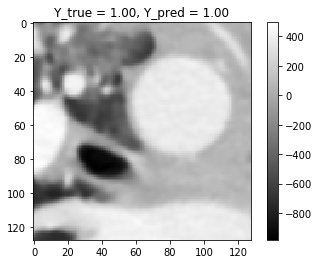

In [26]:
id = np.random.randint(2*N)

true_label = data['Y_train'][id]
pred_label = data['Y_train_pred'][id]
x          = data['X_train'][id].reshape((128,128))

plt.figure()
plt.title("Y_true = {:.2f}, Y_pred = {:.2f}".format(true_label, pred_label))
plt.imshow(x, cmap='gray')
plt.colorbar()
plt.show()